# [LAB 06] 7. 데이터 분포 시각화
### 패키지 참조

### Scatter Plot 의 이해
두 연속형 변수의 관계를 시각화 하는 가장 기본적인 그래프    
두 연속형 변수간의 영향력(분포와 상관 경향)을 점으로 표시.   
패턴(직선적,곡선적),군집 형태, 이상치를 쉽게 파악.  
통계적 모델은 포함.  

In [1]:
from hossam import load_data
from matplotlib import font_manager as fm
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

#### 그래프 초기화

In [2]:
my_dpi = 200
fpath = "./NotoSansKR-Regular.ttf"
fm.fontManager.addfont(fpath)
fprop = fm.FontProperties(fname=fpath) # 폰트의 속성을 읽어옴
fname = fprop.get_name() # 읽어온 속성에서 폰트의 이름만 추출
plt.rcParams['font.family'] = fname
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

#### 데이터 가져오기

In [4]:
origin = load_data("icecream")
origin

[data] https://data.hossam.kr/data/lab06/icecream.xlsx
[desc] 기온과 아이스크림 판매량을 기록한 가상의 데이터 (메타데이터,인덱스 없음)
[!] Cannot read metadata


,기온,판매량
0,23,431
1,36,593
2,30,512
3,25,474
4,26,476
5,31,523
6,29,491
7,32,526
8,33,550
9,24,456


### #02. Scatter Plot 시각화
hue 파라미터로 데이터 범주 구별이 가능함

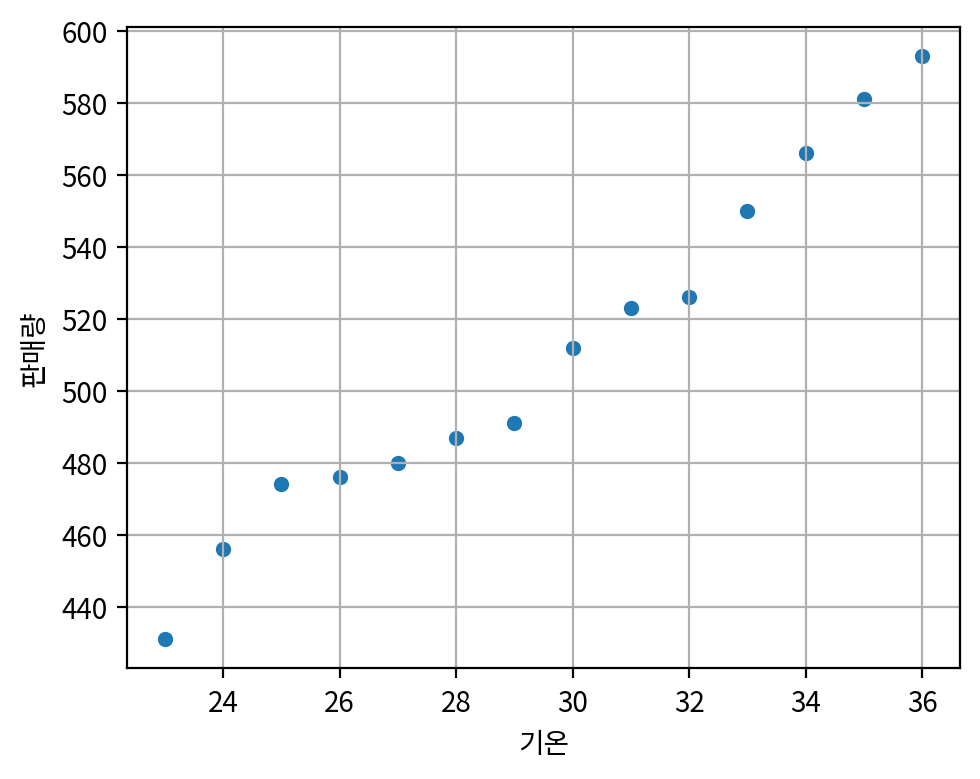

In [5]:
# 1) 그래프 초기화 (캔바스(fig)와 도화지(ax) 준비하기)
width_px = 1000
height_px = 800
rows = 1
cols = 1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

#2) 그래프 그리기 -> seaborn 사용
sb.scatterplot(data=origin, x='기온',y='판매량')

#3) 그래프 꾸미기
ax.grid(True)


# 4) 출력

plt.tight_layout()
#plt.savefig("myplot.png", dpi=my_dpi)
plt.show() # 그래프 화면 출력
plt.close()

#### #03. 추세선(회귀선) 그리기

In [7]:
z = np.polyfit(origin['기온'], origin['판매량'], 1)
print("상수항:", z[0])
print("계수:", z[1])

상수항: 11.39780219780219
계수: 174.19340659340702


In [8]:
expr = "y = %0.1f * x + %0.1f" % (z[0], z[1])
expr

'y = 11.4 * x + 174.2'

In [9]:
f = np.poly1d(z)
f

poly1d([ 11.3978022 , 174.19340659])

In [10]:
x = 40
print("기온이 %d일 경우 아이스크림 판매량은 %f로 예상됩니다." % (x, f(x)))

기온이 40일 경우 아이스크림 판매량은 630.105495로 예상됩니다.


In [11]:
x = origin['기온']
y = f(x)
y

array([436.34285714, 584.51428571, 516.12747253, 459.13846154,
       470.53626374, 527.52527473, 504.72967033, 538.92307692,
       550.32087912, 447.74065934, 561.71868132, 573.11648352,
       481.93406593, 493.33186813])

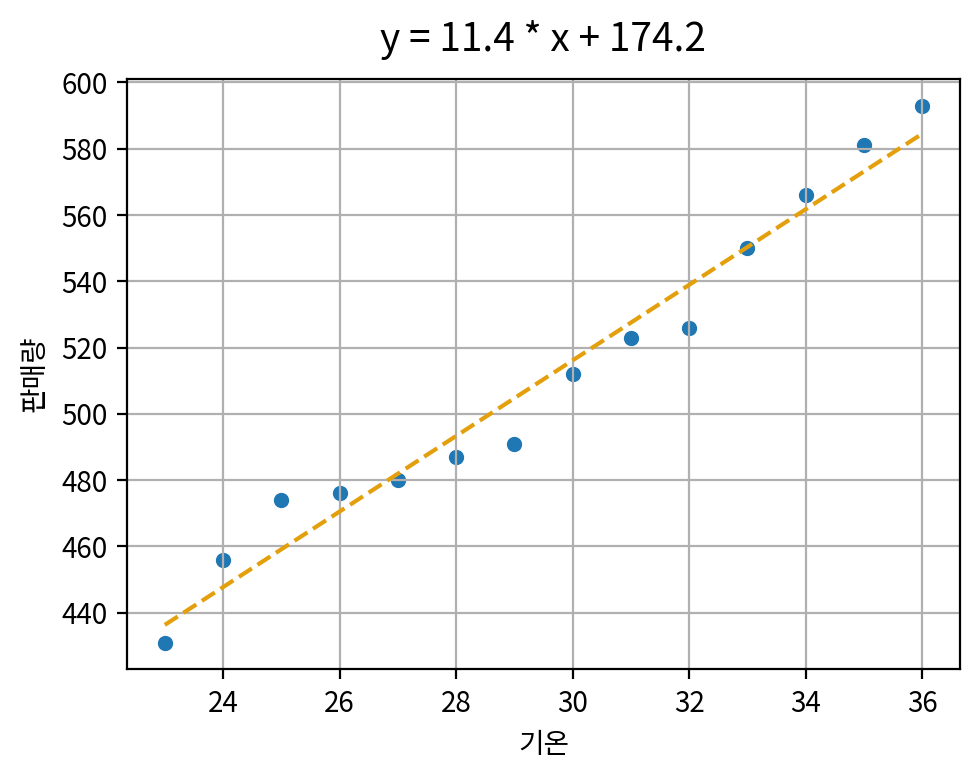

In [13]:
# 1) 그래프 초기화 (캔바스(fig)와 도화지(ax) 준비하기)
width_px = 1000
height_px = 800
rows = 1
cols = 1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

#2) 그래프 그리기 -> seaborn 사용
sb.scatterplot(data=origin, x='기온',y='판매량')

sb.lineplot(x=x,y=y,color="#e4a00c", linestyle="--")

#3) 그래프 꾸미기
ax.set_title(expr, fontsize=14, pad=10)
ax.grid(True)


# 4) 출력

plt.tight_layout()
#plt.savefig("myplot.png", dpi=my_dpi)
plt.show() # 그래프 화면 출력
plt.close()